<a href="https://colab.research.google.com/github/Idowuilekura/idowu10academy3rdbatch/blob/master/Copy_of_idowu_scrapping_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Web scrapping using python

#### References
1. [Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
2. [Web Scraping using Python](https://www.datacamp.com/community/tutorials/web-scraping-using-python)

In [1]:
# $ python3 -m venv venv
# $ . ./venv/bin/activate

In [2]:
#Better
!pip install requests BeautifulSoup4 fire

     |████████████████████████████████| 81kB 2.1MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=af98e583cb9f3842c596c528fe046f1da5ecb81bc87eb84bda8a0b84b3184dc6
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire


In [3]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys
from tweepy import Cursor
from datetime import datetime,date,time,timedelta
import fire

In [4]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

In [5]:
#res = get_tag_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa')
#res

In [6]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)

In [7]:
res = get_elements(response, search={'find_all':{'class_':'wp-block-embed__wrapper'}})

findaing all of {'class_': 'wp-block-embed__wrapper'}


In [8]:
import re
empty_list = []
for i in res:
    str_i = str(i)
    extract = re.findall(r"\(@\w+\)",str_i)
    empty_list.append(extract)
#print(empty_list)
another_list = []
for i in empty_list:
    if len(i) !=0:
        another_list.append(i)
another_list
final_list = []
for i in another_list:
    remove_element=i[0]
    remove_firbrac = remove_element.replace("(","")
    remove_secondbrac = remove_firbrac.replace(")","")
    final_list.append(remove_secondbrac)
#print(final_list)
ten_top_leaders = final_list[:10]
print(ten_top_leaders)
import pandas as pd
ten_top_series = pd.Series(ten_top_leaders)
ten_top_series.to_csv("ten_top_africa_leaders_handles",encoding='utf-8',index=False)

['@EswatiniGovern1', '@MalawiGovt', '@hagegeingob', '@FinanceSC', '@PresidencyZA', '@mohzambia', '@edmnangagwa', '@MinSantedj', '@hawelti', '@StateHouseKenya']


In [9]:
africa_heads_handle = ["@ukenyatta","@paulkagame","@alsisiofficial","@mbuhari","@KagutaMuseveni","@sappresident","@NakufoAddo","@magufulijp","@adosolutions","@macky_sall"]
africa_leaders = []
for i in africa_heads_handle:
    for b in final_list:
        if i.lower() == b.lower():
            africa_leaders.append(i)

print(africa_leaders)

['@paulkagame', '@mbuhari', '@KagutaMuseveni', '@NakufoAddo', '@macky_sall']


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
import json
with open('/content/drive/My Drive/data_science_project/twitter_credentials.json') as file:
  cred =json.load(file)
import tweepy
auth = tweepy.OAuthHandler(cred["CONSUMER_KEY"],cred["CONSUMER_SECRET"])
auth.set_access_token(cred["ACCESS_TOKEN"],cred["ACCESS_SECRET"])
api = tweepy.API(auth,wait_on_rate_limit=True)

In [12]:
print(final_list)

['@EswatiniGovern1', '@MalawiGovt', '@hagegeingob', '@FinanceSC', '@PresidencyZA', '@mohzambia', '@edmnangagwa', '@MinSantedj', '@hawelti', '@StateHouseKenya', '@PaulKagame', '@M_Farmaajo', '@SouthSudanGov', '@SudanPMHamdok', '@TZSpokesperson', '@KagutaMuseveni', '@angola_Mirex', '@willynyamitwe', '@Cherif_MZ', '@Presidence_RDC', '@PresidentABO', '@PresidenceBenin', '@rochkaborepf', '@PresidenciaCV', '@AOuattara_PRCI', '@Presidency_GMB', '@NAkufoAddo', '@President_GN', '@USEmbalo', '@PresidenceMali', '@CheikhGhazouani', '@IssoufouMhm', '@MBuhari', '@Macky_Sall', '@PresidentBio', '@MSPS_Togo']


In [13]:
numbers_of_tweet = {'twitter_handle':[],"number_tweet":[],"number_of_followers":[],"number_of_following":[],"number_of_likes":[],"average_tweets_per_day":[],"account_age":[],"number_of_mentions":[],"hashtags":[]}
for twitter_handle in final_list:
  numbers_of_tweet["twitter_handle"].append(twitter_handle)
  numbers_of_tweet["number_tweet"].append(api.get_user(twitter_handle).statuses_count)


In [14]:
for i in final_list:
  user = api.get_user(i)
  user_followers = user.followers_count
  numbers_of_tweet["number_of_followers"].append(user_followers)


In [15]:
print(numbers_of_tweet['number_of_followers'])

[11352, 39430, 192774, 127, 1600977, 7211, 547553, 2937, 66501, 1105403, 1988358, 425268, 2565, 372141, 4042, 1817077, 3274, 107491, 18799, 342008, 173943, 30237, 256768, 3291, 834846, 10798, 1511141, 741, 8483, 229265, 31843, 116541, 3276245, 1377585, 15093, 1134]


In [16]:
for twitter_handle in final_list:
  user = api.get_user(twitter_handle)
  user_following = user.friends_count
  numbers_of_tweet["number_of_following"].append(user_following)

print(api.get_user('@mbuhari').friends_count)

26


In [17]:
buhari=api.get_user('mbuhari')
buhari

User(_api=<tweepy.api.API object at 0x7ff3fb185f98>, _json={'id': 2936714848, 'id_str': '2936714848', 'name': 'Muhammadu Buhari', 'screen_name': 'MBuhari', 'location': '', 'profile_location': None, 'description': 'This is the official account of Muhammadu Buhari, President of Nigeria', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3276245, 'friends_count': 26, 'listed_count': 1650, 'created_at': 'Mon Dec 22 08:56:35 +0000 2014', 'favourites_count': 8, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 4737, 'lang': None, 'status': {'created_at': 'Mon Jul 20 18:36:46 +0000 2020', 'id': 1285282517600407554, 'id_str': '1285282517600407554', 'text': 'King Salman is a true friend of Nigeria who has never failed to identify with us at all times through important col… https://t.co/Sa8NHg6FYf', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https

In [18]:
for twitter_handle in final_list:
  user= api.get_user(twitter_handle)
  number_of_users_tweets = user.statuses_count
  account_created_date = user.created_at
  delta = datetime.utcnow()-account_created_date
  account_age_days =delta.days
  numbers_of_tweet['account_age'].append(account_created_date)
  # get the utc of time of created account
  if account_age_days>0:
    average_tweets_per_day = float(number_of_users_tweets)/float(account_age_days)
    numbers_of_tweet['average_tweets_per_day'].append(round(average_tweets_per_day,1))
  

In [19]:
print(len(numbers_of_tweet['account_age']))

36


In [20]:
import numpy as np

In [21]:
def mentions_and_hashtags(user):
  hashtags = []
  mentions = []
  end_date = datetime.utcnow()-timedelta(days=30)
  for status in tweepy.Cursor(api.user_timeline,id=user,q='-filter:retweets').items(30):
    if hasattr(status,"entities"):
      entities = status.entities
      if "hashtags" in entities:
        for ent in entities['hashtags']:
          if ent is not None:
            if 'text' in ent:
              hashtag = ent['text']
              if hashtag is not None:
                hashtags.append(hashtag)
      #mention_count = 0
    if "user_mentions" in entities:
      for ent in entities["user_mentions"]:
        if ent is not None:
          if "screen_name" in ent:
            name = ent['screen_name']
            if name is not None:
             #mention_count += 1
              mentions.append(name)
    if status.created_at < end_date:
      break
  return hashtags,len(mentions)


In [22]:
#hashta,ment = mentions_and_hashtags('@idowuilekura')
#print(hashta)

In [23]:
for twitter_handles in final_list:
  hasht,ment= mentions_and_hashtags(twitter_handles)
  numbers_of_tweet['hashtags'].append(hasht)
  numbers_of_tweet["number_of_mentions"].append(ment)

In [24]:
print(len(numbers_of_tweet['number_of_mentions']))

36


In [25]:
# likes = 0
# for status in Cursor(api.user_timeline,id="@idowuilekura",include_rts=False).items(100):
#   likes += status.favorite_count
# print(likes)

In [26]:
def likes(user):
  likes = 0
  for status in Cursor(api.user_timeline,id=user,include_rts=False).items(100):
    likes += status.favorite_count
  return likes

In [27]:
for twitter_handle in final_list:
  like = likes(twitter_handle)
  numbers_of_tweet["number_of_likes"].append(like)

In [28]:
#numbers_of_tweet['number_of_likes']
def retweet(user):
  retweet_ = 0
  for status in Cursor(api.user_timeline,id=user,include_rts=False).items(100):
    retweet_ += status.retweet_count
  return retweet_

In [29]:
numbers_of_retweets = []
for twitter_handle in final_list:
  retweet1 = retweet(twitter_handle)
  numbers_of_retweets.append(retweet1)

In [30]:
numbers_of_tweet['number_of_retweets'] = numbers_of_retweets

In [31]:
africa_leaders_dict = numbers_of_tweet
# for keys in africa_leaders_dict.keys():
#   print(keys)
#   print(len(africa_leaders_dict[keys]))
import pandas as pd
africa_leaders_df = pd.DataFrame(africa_leaders_dict)


In [32]:
#africa_leaders_df.drop('top_five_hashtags',axis=1,inplace=True)

In [33]:
from collections import Counter
list_ = [] 
for twitter_handle in africa_leaders_dict['hashtags']:
  list1 = []
  for item,count in Counter(twitter_handle).most_common(5):
    list1.append(item)
  list_.append(list1)


In [34]:
print(list_)

[['COVID19'], ['InaugurationMalawi2020', 'MalawiCabinet', 'Malawi', 'IndependenceDay'], ['ZindziMandela', 'DRC', 'HappyFathersDay2020'], [], ['Ramaphosa', 'MandelaDay', 'COVID19'], ['COVID19', 'ParentingMonth'], ['4thOfJuly'], ['France', 'Djibouti', 'COVID19', 'Hackathon'], ['Eritrea', 'Ethiopia', 'Teleferica', 'Italians'], ['JukumuniSisi', 'Covid19', 'Covid_19', 'KomeshaCorona', 'COVIDー19'], [], ['Somalia'], ['SouthSudan', 'Kiir', 'Covid19ss', 'AUMISS', 'SRCC'], [], [], ['COVID19', 'WorldPopulationDay2020', 'Jinja', 'Arua', 'Gulu'], [], ['Burundi', 'Brazzaville', 'RDCongo', 'COUSP'], [], ['RDC', 'CitéUA', 'PalaisdelaNation', 'PalaisdeJustice', 'Indépendance'], ['Gabon', 'Education'], ['Wasexo', 'ConseilDesMinistres', 'Prbenin', 'Gouvbenin', 'MS'], ['G5Sahel', 'BurkinaFaso', 'Lwili', 'Mauritanie', 'France'], [], [], ['Gambia', 'Covid19Gambia', 'DidYouKnow', 'Covid19', 'gambia'], ['4MoreToDoMoreForYou', 'RegisterToVote2020', 'GovtThisWeek', 'FellowGhanaians', 'FightCOVID19'], ['COVID19'

In [35]:
africa_leaders_df['most_used_hashtags'] = list_

In [36]:
africa_leaders_df.rename({'number_tweet':'total_tweets_number','number_of_likes':'total_tweets_likes','account_age':'handle_creation_date'},axis=1,inplace=True)

In [37]:
africa_leaders_df.rename({
    'number_of_followers':'followers','number_of_following':'following'
    },axis=1,inplace=True)

In [38]:
names = []
for username in final_list:
  user = api.get_user(username)
  nam = user.name
  names.append(nam)
print(names)

['Eswatini Government', 'Malawi Government', 'Hage G. Geingob', 'Seychelles Ministry of Finance', 'Presidency | South Africa 🇿🇦', 'Ministry of Health Zambia', 'President of Zimbabwe', 'MinSantédj', 'Yemane G. Meskel', 'State House Kenya', 'Paul Kagame', 'Mohamed Farmaajo', 'South Sudan Government', 'Abdalla Hamdok', 'TanzaniaSpokesperson', 'Yoweri K Museveni', 'MOFA/MRE -(Angola)', 'Amb. Willy Nyamitwe', 'Chérif Mahamat Zene', 'Présidence RDC 🇨🇩', 'Ali Bongo Ondimba', 'Présidence du Bénin', 'Roch KABORE', 'Presidente Cabo Verde', 'Alassane Ouattara', 'State House of The Gambia', 'Nana Akufo-Addo', 'Alpha CONDÉ', 'Umaro Sissoco Embalo', 'Presidence Mali', 'Mohamed Cheikh El Ghazouani محمد ولدالشيخ الغزواني', 'Issoufou Mahamadou', 'Muhammadu Buhari', 'Macky Sall', 'President Julius Maada Bio', "Ministère de la Santé et de l'hygiène Publique"]


In [39]:
africa_leaders_df['twitter_name'] = names

In [40]:
africa_leaders_df.head()

,twitter_handle,total_tweets_number,followers,following,total_tweets_likes,average_tweets_per_day,handle_creation_date,number_of_mentions,hashtags,number_of_retweets,most_used_hashtags,twitter_name
0,@EswatiniGovern1,1686,11352,82,1889,5.9,2019-10-09 07:33:24,1,"[COVID19, COVID19, COVID19, COVID19, COVID19, ...",585,[COVID19],Eswatini Government
1,@MalawiGovt,4031,39430,26,8617,1.7,2013-11-12 09:15:34,17,"[Malawi, MalawiCabinet, MalawiCabinet, MalawiC...",2618,"[InaugurationMalawi2020, MalawiCabinet, Malawi...",Malawi Government
2,@hagegeingob,1087,192774,55,35162,0.5,2014-05-22 17:17:17,1,"[ZindziMandela, DRC, HappyFathersDay2020]",4836,"[ZindziMandela, DRC, HappyFathersDay2020]",Hage G. Geingob
3,@FinanceSC,126,127,224,124,1.0,2020-03-17 11:14:52,0,[],18,[],Seychelles Ministry of Finance
4,@PresidencyZA,18888,1600977,14,12578,4.6,2009-05-18 08:38:44,8,"[Ramaphosa, MandelaDay, Ramaphosa, Ramaphosa, ...",5137,"[Ramaphosa, MandelaDay, COVID19]",Presidency | South Africa 🇿🇦


In [41]:
africa_leaders_df['popularity_score']= africa_leaders_df['number_of_retweets'] + africa_leaders_df['total_tweets_likes']

In [42]:
africa_leaders_df['reach_score'] = africa_leaders_df['followers'] - africa_leaders_df['following']

In [43]:
africa_leaders_df['relevance_score'] = africa_leaders_df['number_of_mentions']

In [44]:
import requests 
page = requests.get("https://africafreak.com/100-most-influential-twitter-users-in-africa")
content = page.content
#print(page.status_code)
soup = BeautifulSoup(content,'html.parser')
names = soup.find_all('h2')
name = [i.get_text(strip=True) for i in names]
name = name[:-5]
most_influential_handles =[]
uncleaned_handles = []
for i in name:
    splitted_name = i.split()
    index = len(splitted_name)-1
    uncleaned_handles.append(splitted_name[index])
for b in uncleaned_handles:
    remove_first = b.replace("(","") # remove first parenthesis
    remove_second = remove_first.replace(")","") # remove second parenthesis
    most_influential_handles.append(remove_second)

In [45]:
import numpy as np
influencers_dict = {'twitter_handle':[],"number_tweet":[],"number_of_followers":[],"number_of_following":[],"number_of_likes":[],"average_tweets_per_day":[],"account_age":[],"number_of_mentions":[],"hashtags":[],"number_of_reweets":[]}


In [46]:
for twitter_handles in most_influential_handles:
  influencers_dict["twitter_handle"].append(twitter_handles)
  try:
    influencers_dict["number_tweet"].append(api.get_user(twitter_handles).statuses_count)
  except tweepy.error.TweepError:
    influencers_dict['number_tweet'].append(np.NaN)

In [47]:
print(len(influencers_dict['number_tweet']))

100


In [48]:
for twitter_handles in most_influential_handles:
  try:
    user = api.get_user(twitter_handles)
    user_following = user.friends_count
    influencers_dict["number_of_following"].append(user_following)
  except tweepy.error.TweepError:
    influencers_dict['number_of_following'].append(np.NaN)



In [49]:
print(len(influencers_dict['number_of_following']))

100


In [50]:
influencers_dict['average_tweets_per_day'] = []

In [51]:
for twitter_handles in most_influential_handles:
  try:
    user= api.get_user(twitter_handles)
    number_of_users_tweets = user.statuses_count
    account_created_date = user.created_at
    delta = datetime.utcnow()-account_created_date
    account_age_days =delta.days
    influencers_dict['account_age'].append(account_created_date)
    # get the utc of time of created account
    if account_age_days>0:
      average_tweets_per_day = float(number_of_users_tweets)/float(account_age_days)
      influencers_dict['average_tweets_per_day'].append(round(average_tweets_per_day,1))
  except tweepy.error.TweepError:
    #influencers_dict['average_tweets_per_day'].append(np.NaN)
    influencers_dict['average_tweets_per_day'].append(np.NaN)
    influencers_dict['account_age'].append(np.NaN)



In [52]:
print(len(influencers_dict['number_of_likes']))

0


In [53]:
for twitter_handles in most_influential_handles:
  try:
    hash,men = mentions_and_hashtags(twitter_handles)
    influencers_dict['hashtags'].append(hash)
  except tweepy.error.TweepError:
    influencers_dict['hashtags'].append(np.NaN)

In [54]:
for twitter_handles in most_influential_handles:
  try:
    hash,men = mentions_and_hashtags(twitter_handles)
    influencers_dict['number_of_mentions'].append(men)
  except tweepy.error.TweepError:
    influencers_dict['number_of_mentions'].append(np.NaN)
  

In [55]:
for twitter_handles in most_influential_handles:
  try:
    like = likes(twitter_handles)
    influencers_dict['number_of_likes'].append(like)
  except tweepy.error.TweepError:
    influencers_dict['number_of_likes'].append(np.NaN)


In [56]:
for twitter_handles in most_influential_handles:
  try:
    user = api.get_user(twitter_handles)
    user_followers = user.followers_count
    influencers_dict["number_of_followers"].append(user_followers)
  except tweepy.TweepError:
    influencers_dict['number_of_followers'].append(np.NaN)

In [57]:
print(influencers_dict['number_of_following'])

[37, 3059, 2841, 4590, 5048, 2876, 179, 0, 1731, 366, 2927, 1818, nan, 2138, 894, 294, 172, 2988, 132, 425, 660, 2254, 813, 754, 940, 3602, nan, nan, 15, 0, 1155, 89596, 220, nan, 1644, 49691, 151, 2415, 653, 1918, 1980, 983, 0, 1904, 3122, 1347, 3714, 4613, 405, 1012, nan, 1142, 61959, 1114, 757, 1488, 657, 391, 1940, 25636, 5471, 3166, 1545, 74104, nan, 10842, 141, 128, 11, 3345, 479, 987, 561, 1641, 2205, 985, 186, 305, 0, 455, 1617, 269, 2991, 25598, 0, 65, 530184, nan, 1995, 109, 1225, 3951, 411, 478, 2302, 651, 632, 14, 356, 325]


In [78]:
africa_influencers_dict = influencers_dict
#influencers_dict.pop('number_of_reweets')
for keys in influencers_dict.keys():
  print(keys)
  print(len(africa_influencers_dict[keys]))

import pandas as pd
africa_influencers_df = pd.DataFrame(africa_influencers_dict)

twitter_handle
100
number_tweet
100
number_of_followers
100
number_of_following
100
number_of_likes
100
average_tweets_per_day
100
account_age
100
number_of_mentions
100
hashtags
100
number_of_retweets
100


In [65]:
for twitter_handles in most_influential_handles:
  try:
    retweet2 = retweet(twitter_handles)
    africa_influencers_dict['number_of_retweets'].append(retweet2)
  except tweepy.error.TweepError:
    africa_influencers_dict['number_of_retweets'].append(np.NaN)


In [64]:
africa_influencers_dict['number_of_retweets'] = []

In [66]:
print(len(africa_influencers_dict['number_of_retweets']))

100


In [67]:
names =[]
for twitter_handles in most_influential_handles:
  try:
    user = api.get_user(twitter_handles)
    names.append(user.name)
  except tweepy.error.TweepError:
    names.append(np.NaN)

In [68]:
print(len(names))

100


In [79]:
africa_influencers_df['twitter_names'] = names

In [80]:
africa_influencers_df.head()

,twitter_handle,number_tweet,number_of_followers,number_of_following,number_of_likes,average_tweets_per_day,account_age,number_of_mentions,hashtags,number_of_retweets,twitter_names
0,@gettleman,3773.0,25709.0,37.0,10183.0,1.1,2011-05-25 17:49:42,39.0,"[COVID19, PLA, IndianArmy, COVID19]",3952.0,Jeffrey Gettleman
1,@a24media,16871.0,31287.0,3059.0,215.0,4.1,2009-03-25 11:29:33,23.0,"[FlattenTheCurve, YeboWatchParty, YeboWatchPar...",42.0,NaN
2,@andiMakinana,142268.0,101329.0,2841.0,1674.0,35.8,2009-09-06 10:53:07,39.0,"[SchoolRun, UDM]",605.0,Scapegoat
3,@AfricaCheck,27343.0,68071.0,4590.0,396.0,9.3,2012-07-03 11:34:29,32.0,"[factcheck, African, Covid, miniquiz, African,...",454.0,Africa Check
4,@JamesCopnall,19439.0,21966.0,5048.0,572.0,6.1,2011-10-30 17:32:39,46.0,"[Sudan, Sudan, Malawi, BBCFocusOnAfrica, Newsd...",70.0,James Copnall


In [81]:
africa_influencers_df['popularity_score'] = africa_influencers_df[
                                                                  'number_of_retweets'
                                                                  ] + africa_influencers_df[
                                                                                            'number_of_likes'
                                                                                            ]

In [82]:
africa_influencers_df['reach_score']= africa_influencers_df[
                                                            'number_of_followers'
]- africa_influencers_df['number_of_following']

In [83]:
africa_influencers_df['relevance_score'] = africa_influencers_df['number_of_mentions'
                                                                 
]

In [84]:
africa_influencers_df.rename({'number_tweet':'total_tweets_number','number_of_likes':'total_tweets_likes','account_age':'handle_creation_date','number_of_followers':'followers','number_of_following':'following'},axis=1,inplace=True)

In [85]:
africa_leaders_popularity = africa_leaders_df.sort_values(by='popularity_score',ascending=False)

In [86]:
top_10_popular_leaders= africa_leaders_popularity.head(10)

In [87]:
top_10_popular_leaders

,twitter_handle,total_tweets_number,followers,following,total_tweets_likes,average_tweets_per_day,handle_creation_date,number_of_mentions,hashtags,number_of_retweets,most_used_hashtags,twitter_name,popularity_score,reach_score,relevance_score
26,@NAkufoAddo,7103,1511141,352,649859,2.1,2011-02-04 10:14:22,18,"[RegisterToVote2020, 4MoreToDoMoreForYou, Regi...",112518,"[4MoreToDoMoreForYou, RegisterToVote2020, Govt...",Nana Akufo-Addo,762377,1510789,18
10,@PaulKagame,2864,1988358,181,342946,0.7,2009-05-04 05:16:24,2,[],73407,[],Paul Kagame,416353,1988177,2
11,@M_Farmaajo,600,425268,2,183298,0.5,2016-12-24 11:53:28,4,[Somalia],34495,[Somalia],Mohamed Farmaajo,217793,425266,4
13,@SudanPMHamdok,655,372141,115,169999,2.0,2019-08-23 07:28:09,3,[],28830,[],Abdalla Hamdok,198829,372026,3
15,@KagutaMuseveni,6646,1817077,28,164914,1.8,2010-03-27 15:08:09,3,"[COVID19, WorldPopulationDay2020, Jinja, Arua,...",24455,"[COVID19, WorldPopulationDay2020, Jinja, Arua,...",Yoweri K Museveni,189369,1817049,3
6,@edmnangagwa,628,547553,116,131368,0.2,2011-12-27 11:26:29,3,[4thOfJuly],29540,[4thOfJuly],President of Zimbabwe,160908,547437,3
32,@MBuhari,4737,3276245,26,110684,2.3,2014-12-22 08:56:35,1,[],25783,[],Muhammadu Buhari,136467,3276219,1
33,@Macky_Sall,2796,1377585,171,95935,0.8,2010-10-01 17:05:26,12,"[ConseildesMinistresSn, ConseildesMinistresSn,...",12810,"[ConseildesMinistresSn, ConseilDesMinistresSn,...",Macky Sall,108745,1377414,12
19,@Presidence_RDC,1652,342008,125,67078,1.3,2017-01-07 14:17:29,0,"[RDC, PalaisdeJustice, RDC, CitéUA, RDC, RDC, ...",8905,"[RDC, CitéUA, PalaisdelaNation, PalaisdeJustic...",Présidence RDC 🇨🇩,75983,341883,0
30,@CheikhGhazouani,30,31843,9,63353,0.1,2019-12-19 20:59:01,0,[],7938,[],Mohamed Cheikh El Ghazouani محمد ولدالشيخ الغز...,71291,31834,0


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0, flags=flags)


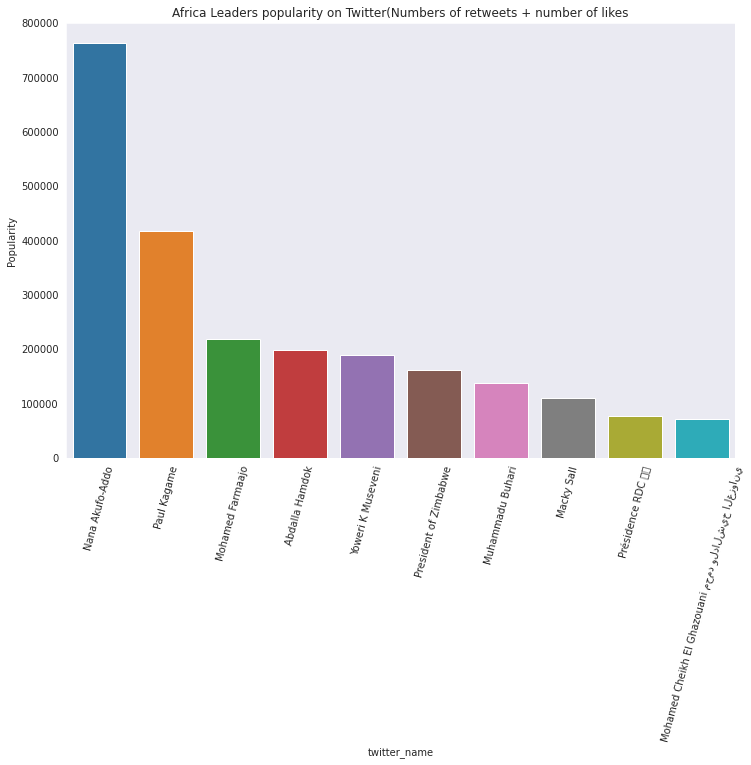

In [93]:
fig,ax = plt.subplots(figsize=(12,8
                            ))
g=sns.barplot(x='twitter_name',y='popularity_score',data=top_10_popular_leaders)
ax.set_xticklabels(top_10_popular_leaders['twitter_name'],rotation = 75)
ax.set_title('Africa Leaders popularity on Twitter(Numbers of retweets + number of likes')
ax.set_ylabel('Popularity')
plt.savefig('popularity1.png')

In [89]:
top_10_popular_leaders['Rank by popularity'] = top_10_popular_leaders['popularity_score'].rank(ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
top_10_popular_leaders.head()

,twitter_handle,total_tweets_number,followers,following,total_tweets_likes,average_tweets_per_day,handle_creation_date,number_of_mentions,hashtags,number_of_retweets,most_used_hashtags,twitter_name,popularity_score,reach_score,relevance_score,Rank by popularity
26,@NAkufoAddo,7103,1511141,352,649859,2.1,2011-02-04 10:14:22,18,"[RegisterToVote2020, 4MoreToDoMoreForYou, Regi...",112518,"[4MoreToDoMoreForYou, RegisterToVote2020, Govt...",Nana Akufo-Addo,762377,1510789,18,1.0
10,@PaulKagame,2864,1988358,181,342946,0.7,2009-05-04 05:16:24,2,[],73407,[],Paul Kagame,416353,1988177,2,2.0
11,@M_Farmaajo,600,425268,2,183298,0.5,2016-12-24 11:53:28,4,[Somalia],34495,[Somalia],Mohamed Farmaajo,217793,425266,4,3.0
13,@SudanPMHamdok,655,372141,115,169999,2.0,2019-08-23 07:28:09,3,[],28830,[],Abdalla Hamdok,198829,372026,3,4.0
15,@KagutaMuseveni,6646,1817077,28,164914,1.8,2010-03-27 15:08:09,3,"[COVID19, WorldPopulationDay2020, Jinja, Arua,...",24455,"[COVID19, WorldPopulationDay2020, Jinja, Arua,...",Yoweri K Museveni,189369,1817049,3,5.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0, flags=flags)


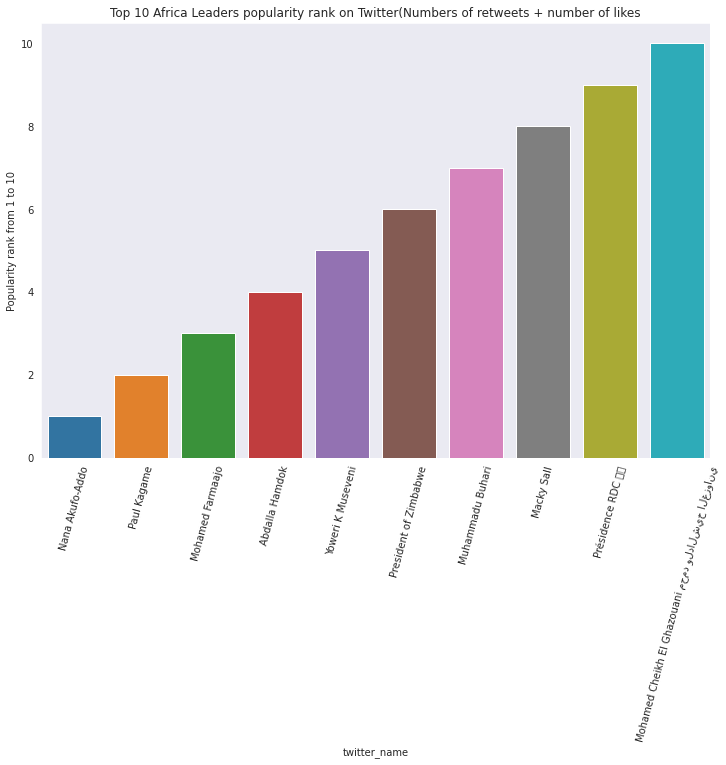

In [92]:
fig,ax = plt.subplots(figsize=(12,8
                            ))
g=sns.barplot(x='twitter_name',y='Rank by popularity',data=top_10_popular_leaders)
ax.set_xticklabels(top_10_popular_leaders['twitter_name'],rotation = 75)
ax.set_title('Top 10 Africa Leaders popularity rank on Twitter(Numbers of retweets + number of likes')
ax.set_ylabel('Popularity rank from 1 to 10')
plt.savefig('popularity2.png')

In [91]:
null_columns= africa_influencers_df[africa_influencers_df['total_tweets_number'].isnull()]
null_columns

,twitter_handle,total_tweets_number,followers,following,total_tweets_likes,average_tweets_per_day,handle_creation_date,number_of_mentions,hashtags,number_of_retweets,twitter_names,popularity_score,reach_score,relevance_score
12,@andBeyondSafari,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,@hurricanevaness,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,@BBCKarenAllen,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,@drewfhinshaw,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,@Afrinnovator,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,@The_New_Age,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,@702JohnRobbie,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This twitter handles are either not existing again or they have been banned, we will drop this columns so it does not affect our analysis



In [94]:
twitter_handles_of_null = null_columns['twitter_handle']
print(list(twitter_handles_of_null))

['@andBeyondSafari', '@hurricanevaness', '@BBCKarenAllen', '@drewfhinshaw', '@Afrinnovator', '@The_New_Age', '@702JohnRobbie']


In [95]:
africa_influencers_df.dropna(axis=0,inplace=True)

In [ ]:
#africa_leaders_dict['hashtags']

In [96]:
list4 = []
for twitter_handles in list(africa_influencers_df['hashtags']):
  if type(twitter_handles) == list:
    list2 = []
    for item,count in Counter(twitter_handles).most_common(5):
      list2.append(item)
    list4.append(list2)
  else:
    list4.append(0)

In [97]:
#len(list1)
africa_influencers_df['most_used_hashtags'] = list4

In [98]:
top_ten_most_popular_influencers = africa_influencers_df.sort_values(by='popularity_score',ascending=False).head(10)
top_ten_most_popular_influencers

,twitter_handle,total_tweets_number,followers,following,total_tweets_likes,average_tweets_per_day,handle_creation_date,number_of_mentions,hashtags,number_of_retweets,twitter_names,popularity_score,reach_score,relevance_score,most_used_hashtags
99,@Trevornoah,11186.0,10812257.0,325.0,1359545.0,2.8,2009-06-11 07:03:48,11.0,[],272266.0,Trevor Noah,1631811.0,10811932.0,11.0,[]
95,@Julius_S_Malema,37224.0,3132856.0,651.0,372528.0,9.8,2010-02-24 14:58:49,43.0,"[EFFTurns7, JuliusMalema, BlackLivesMatter, RI...",82114.0,Julius Sello Malema,454642.0,3132205.0,43.0,"[EFFTurns7, JuliusMalema, BlackLivesMatter, RI..."
60,@MbuyiseniNdlozi,36056.0,1081535.0,5471.0,245274.0,11.6,2012-01-04 14:28:42,31.0,"[EFFTurns7, EFFTurns7, Covid_19, COVID19, BREA...",40223.0,Mbuyiseni Ndlozi,285497.0,1076064.0,31.0,"[EFFTurns7, COVID19, Covid_19, BREAKING]"
86,@UlrichJvV,20012.0,1042235.0,530184.0,51363.0,5.1,2009-10-10 07:33:26,41.0,"[ValuesAndMoney, ValuesAndMoney, BuildingMyFut...",5978.0,Ulrich Janse van Vuuren,57341.0,512051.0,41.0,"[ValuesAndMoney, StretchingMyBudget, BuildingM..."
85,@euphonik,4559.0,1756434.0,65.0,30428.0,1.1,2009-02-18 18:36:47,46.0,"[WorkMode, euNITE947, Eunite, euNITE947, euNIT...",3556.0,Euphonik™♛,33984.0,1756369.0,46.0,"[euNITE947, WorkMode, Eunite]"
88,@OfficialCSA,88553.0,1160236.0,1995.0,15945.0,21.8,2009-06-09 14:27:09,31.0,"[MandelaDay, Blacklivesmatter, Mandeladay, sol...",2363.0,Cricket South Africa,18308.0,1158241.0,31.0,"[SolidarityCup, 3TCricket, BlackLivesMatter, R..."
98,@GarethCliff,31628.0,1974684.0,356.0,14397.0,7.5,2008-12-08 13:20:23,45.0,"[CliffCentralApp, Lockdown, Covid19, SoWhatNow...",2878.0,Gareth Cliff,17275.0,1974328.0,45.0,"[SoWhatNow, CliffCentralApp, Lockdown, Covid19..."
96,@News24,323113.0,3580555.0,632.0,11723.0,72.5,2008-05-08 07:45:58,5.0,[],3468.0,News24,15191.0,3579923.0,5.0,[]
0,@gettleman,3773.0,25709.0,37.0,10183.0,1.1,2011-05-25 17:49:42,39.0,"[COVID19, PLA, IndianArmy, COVID19]",3952.0,Jeffrey Gettleman,14135.0,25672.0,39.0,"[COVID19, PLA, IndianArmy]"
49,@schneiderhome,32747.0,26432.0,1012.0,9464.0,9.3,2010-11-12 12:22:14,23.0,"[ourNHS, GreenNewDeal, StrikeForBlackLives]",2695.0,James Schneider,12159.0,25420.0,23.0,"[ourNHS, GreenNewDeal, StrikeForBlackLives]"


In [99]:
top_ten_most_popular_influencers['Popularity_rank'] = top_ten_most_popular_influencers['popularity_score'].rank(ascending=False)

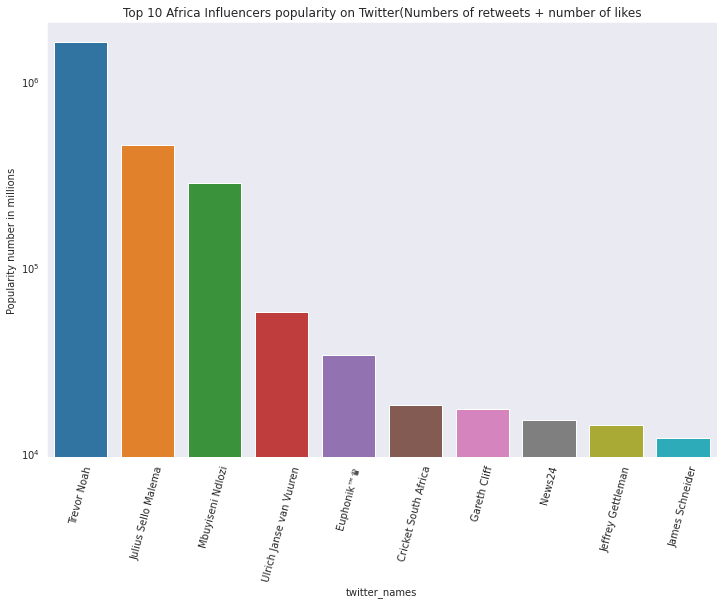

In [100]:
fig,ax = plt.subplots(figsize=(12,8
                            ))
g=sns.barplot(x='twitter_names',y='popularity_score',data=top_ten_most_popular_influencers)
ax.set_xticklabels(top_ten_most_popular_influencers['twitter_names'],rotation = 75)
ax.set_title('Top 10 Africa Influencers popularity on Twitter(Numbers of retweets + number of likes')
ax.set_ylabel('Popularity number in millions')
ax.set_yscale('log')
plt.savefig('popularity_influence1.png')

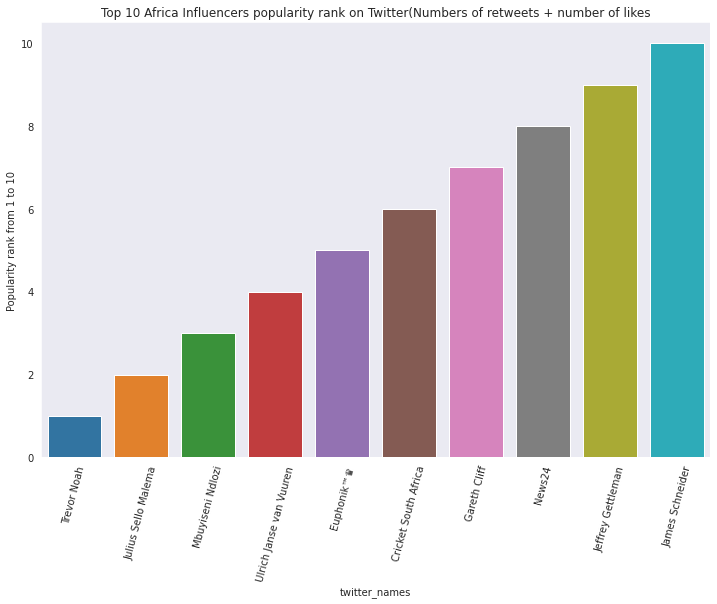

In [101]:
fig,ax = plt.subplots(figsize=(12,8
                            ))
g=sns.barplot(x='twitter_names',y='Popularity_rank',data=top_ten_most_popular_influencers)
ax.set_xticklabels(top_ten_most_popular_influencers['twitter_names'],rotation = 75)
ax.set_title('Top 10 Africa Influencers popularity rank on Twitter(Numbers of retweets + number of likes')
ax.set_ylabel('Popularity rank from 1 to 10')
plt.savefig('popularity_influence2.png')

In [102]:
top_10_most_reached_leader = africa_leaders_df.sort_values(by='reach_score',ascending=False).head(10)

In [103]:
top_10_most_reached_leader['reach_rank_score'] = top_10_most_reached_leader['reach_score'].rank(ascending=False)

In [104]:
top_10_most_reached_influencer = africa_influencers_df.sort_values(by='reach_score',ascending=False).head(10)

In [105]:
top_10_most_reached_influencer['reach_rank_score'] = top_10_most_reached_influencer['reach_score'].rank(ascending=False)

In [106]:
africa_leaders_df.to_csv(index=False)

'twitter_handle,total_tweets_number,followers,following,total_tweets_likes,average_tweets_per_day,handle_creation_date,number_of_mentions,hashtags,number_of_retweets,most_used_hashtags,twitter_name,popularity_score,reach_score,relevance_score\n@EswatiniGovern1,1686,11352,82,1889,5.9,2019-10-09 07:33:24,1,"[\'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\', \'COVID19\']",585,[\'COVID19\'],Eswatini Government,2474,11270,1\n@MalawiGovt,4031,39430,26,8617,1.7,2013-11-12 09:15:34,17,"[\'Malawi\', \'MalawiCabinet\', \'MalawiCabinet\', \'MalawiCabinet\', \'MalawiCabinet\', \'MalawiCabinet\', \'MalawiCabinet\', \'IndependenceDay\', \'Malawi\', \'InaugurationMalawi2020\', \'InaugurationMalawi2020\', \'InaugurationMalawi2020\', \'InaugurationMalawi2020\', \'InaugurationMalawi2020\', \'InaugurationMalawi2020\', \'Malawi\', \'InaugurationMalawi2020\', \'InaugurationMalawi2020\', \'

In [107]:
africa_influencers_df.to_csv(index=False)

'twitter_handle,total_tweets_number,followers,following,total_tweets_likes,average_tweets_per_day,handle_creation_date,number_of_mentions,hashtags,number_of_retweets,twitter_names,popularity_score,reach_score,relevance_score,most_used_hashtags\n@gettleman,3773.0,25709.0,37.0,10183.0,1.1,2011-05-25 17:49:42,39.0,"[\'COVID19\', \'PLA\', \'IndianArmy\', \'COVID19\']",3952.0,Jeffrey Gettleman,14135.0,25672.0,39.0,"[\'COVID19\', \'PLA\', \'IndianArmy\']"\n@andiMakinana,142268.0,101329.0,2841.0,1674.0,35.8,2009-09-06 10:53:07,39.0,"[\'SchoolRun\', \'UDM\']",605.0,Scapegoat,2279.0,98488.0,39.0,"[\'SchoolRun\', \'UDM\']"\n@AfricaCheck,27343.0,68071.0,4590.0,396.0,9.3,2012-07-03 11:34:29,32.0,"[\'factcheck\', \'African\', \'Covid\', \'miniquiz\', \'African\', \'SouthAfrica\', \'COVID19\', \'Kenya\', \'Nigeria\', \'COVID19\', \'Nigeria\', \'COVID19\', \'SouthAfrica\', \'scams\', \'SouthAfrican\', \'COVID19\', \'African\']",454.0,Africa Check,850.0,63481.0,32.0,"[\'COVID19\', \'African\', \'South